In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/Users/shivanshmahajan/Desktop/ML-Crate/Vehicle Live Risk Prediction/Dataset/Vehicle Risk Prediction Dataset.csv")

##used in colab since there was issue in xgboost detection in garuda linux

# Encode categorical features using LabelEncoder
le_visibility = LabelEncoder()
le_road_surface_conditions = LabelEncoder()
le_weather = LabelEncoder()
le_traffic_density = LabelEncoder()
le_road_hazards = LabelEncoder()
#le_time_of_day = LabelEncoder()
le_fatigue_level = LabelEncoder()
le_medical_condition = LabelEncoder()
le_speeding = LabelEncoder()
le_light= LabelEncoder()
#le_road_type=LabelEncoder()
#le_landscape=LabelEncoder()

df['visibility_n'] = le_visibility.fit_transform(df['Visibility'])
df['road_surface_conditions_n'] = le_road_surface_conditions.fit_transform(df['Road_Surface_Conditions'])
df['weather_n'] = le_weather.fit_transform(df['Weather'])
df['traffic_density_n'] = le_traffic_density.fit_transform(df['Traffic_Density'])
df['road_hazards_n'] = le_road_hazards.fit_transform(df['Road_Hazards'])
#df['time_of_day_n'] = le_time_of_day.fit_transform(df['Time_of_Day'])
df['fatigue_level_n'] = le_fatigue_level.fit_transform(df['Fatigue_Level'])
df['medical_condition_n'] = le_medical_condition.fit_transform(df['Medical_Condition'])
df['speeding_n'] = le_speeding.fit_transform(df['Speeding'])
df['light_condition']=le_light.fit_transform(df['Light_Conditions'])
#df['roadtype'] = le_road_type.fit_transform(df['Road_Type'])
#df['landscape_n']=le_landscape.fit_transform(df['Landscape'])


In [2]:
# List of columns to drop (only include those that exist in the DataFrame)
columns_to_drop = ['Light_Conditions', 'Road_Type', 'Landscape', 'Visibility', 'Road_Surface_Conditions', 'Weather', 'Traffic_Density', 'Road_Hazards', 'Time_of_Day', 'Fatigue_Level', 'Medical_Condition', 'Speeding', 'Driver_Age', 'Last_Service_Months_Ago']

# Filter the list to only include columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the columns
df = df.drop(existing_columns_to_drop, axis='columns')

# Verify the remaining columns
print(df.columns)


Index(['Driver_Experience', 'Driver_Awake_Time', 'Vehicle_Speed_Ratio',
       'Cargo_Load', 'Temperature', 'Risk_Score', 'visibility_n',
       'road_surface_conditions_n', 'weather_n', 'traffic_density_n',
       'road_hazards_n', 'fatigue_level_n', 'medical_condition_n',
       'speeding_n', 'light_condition'],
      dtype='object')


<Figure size 1200x600 with 0 Axes>

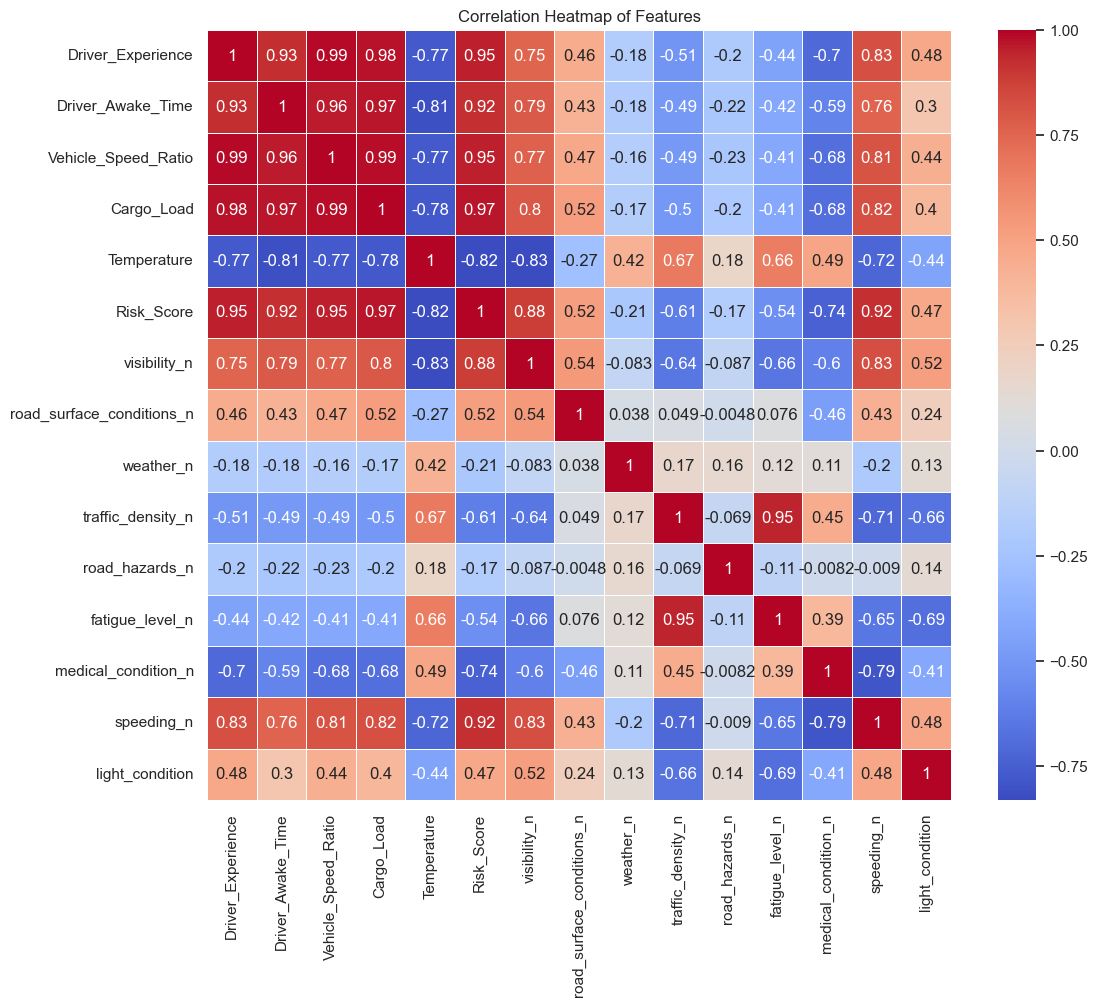

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better readability
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()





Columns in the dataset: Index(['Driver_Experience', 'Driver_Awake_Time', 'Vehicle_Speed_Ratio',
       'Cargo_Load', 'Temperature', 'Risk_Score', 'visibility_n',
       'road_surface_conditions_n', 'weather_n', 'traffic_density_n',
       'road_hazards_n', 'fatigue_level_n', 'medical_condition_n',
       'speeding_n', 'light_condition'],
      dtype='object')
Column 'Visibility' does not exist in the dataset.
Column 'Road_Surface_Conditions' does not exist in the dataset.
Column 'Weather' does not exist in the dataset.
Column 'Traffic_Density' does not exist in the dataset.
Column 'Road_Hazards' does not exist in the dataset.
Column 'Fatigue_Level' does not exist in the dataset.
Column 'Medical_Condition' does not exist in the dataset.
Column 'Speeding' does not exist in the dataset.
Column 'Light_Conditions' does not exist in the dataset.
Remaining columns in the dataset: Index(['Driver_Experience', 'Driver_Awake_Time', 'Vehicle_Speed_Ratio',
       'Cargo_Load', 'Temperature', 'Risk_

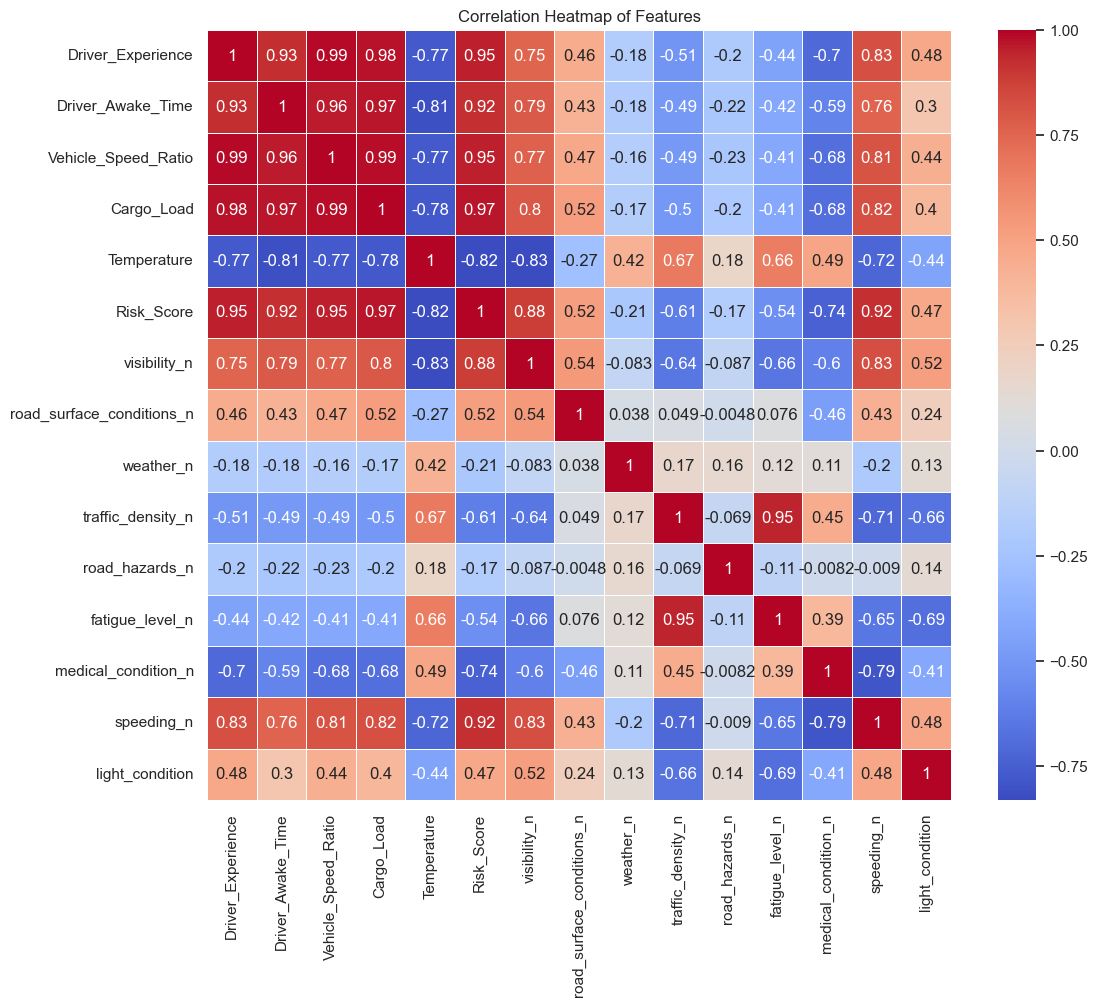

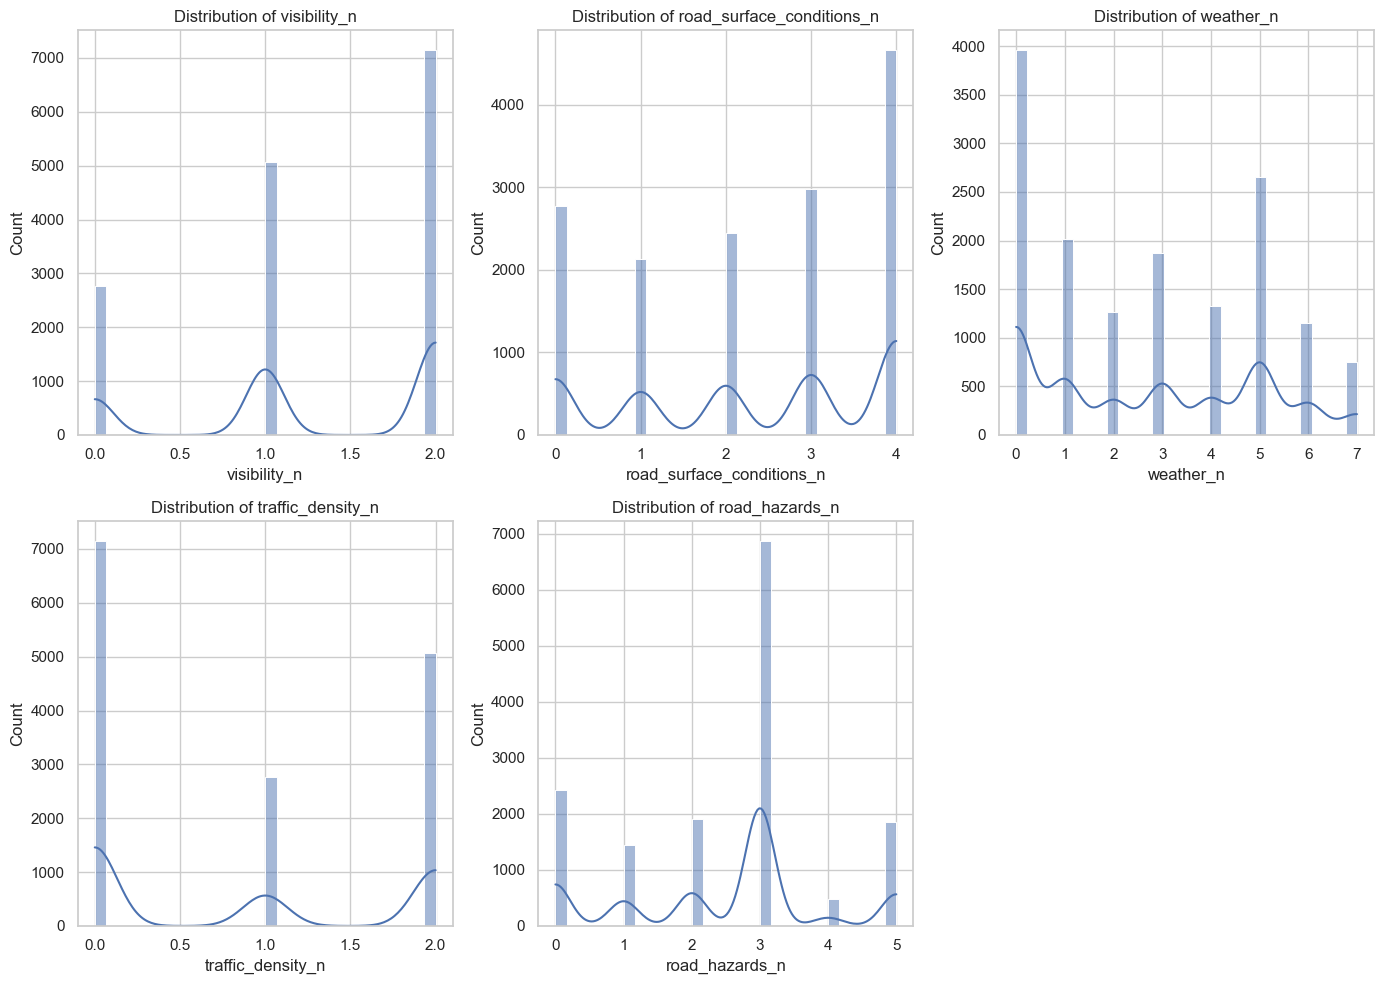

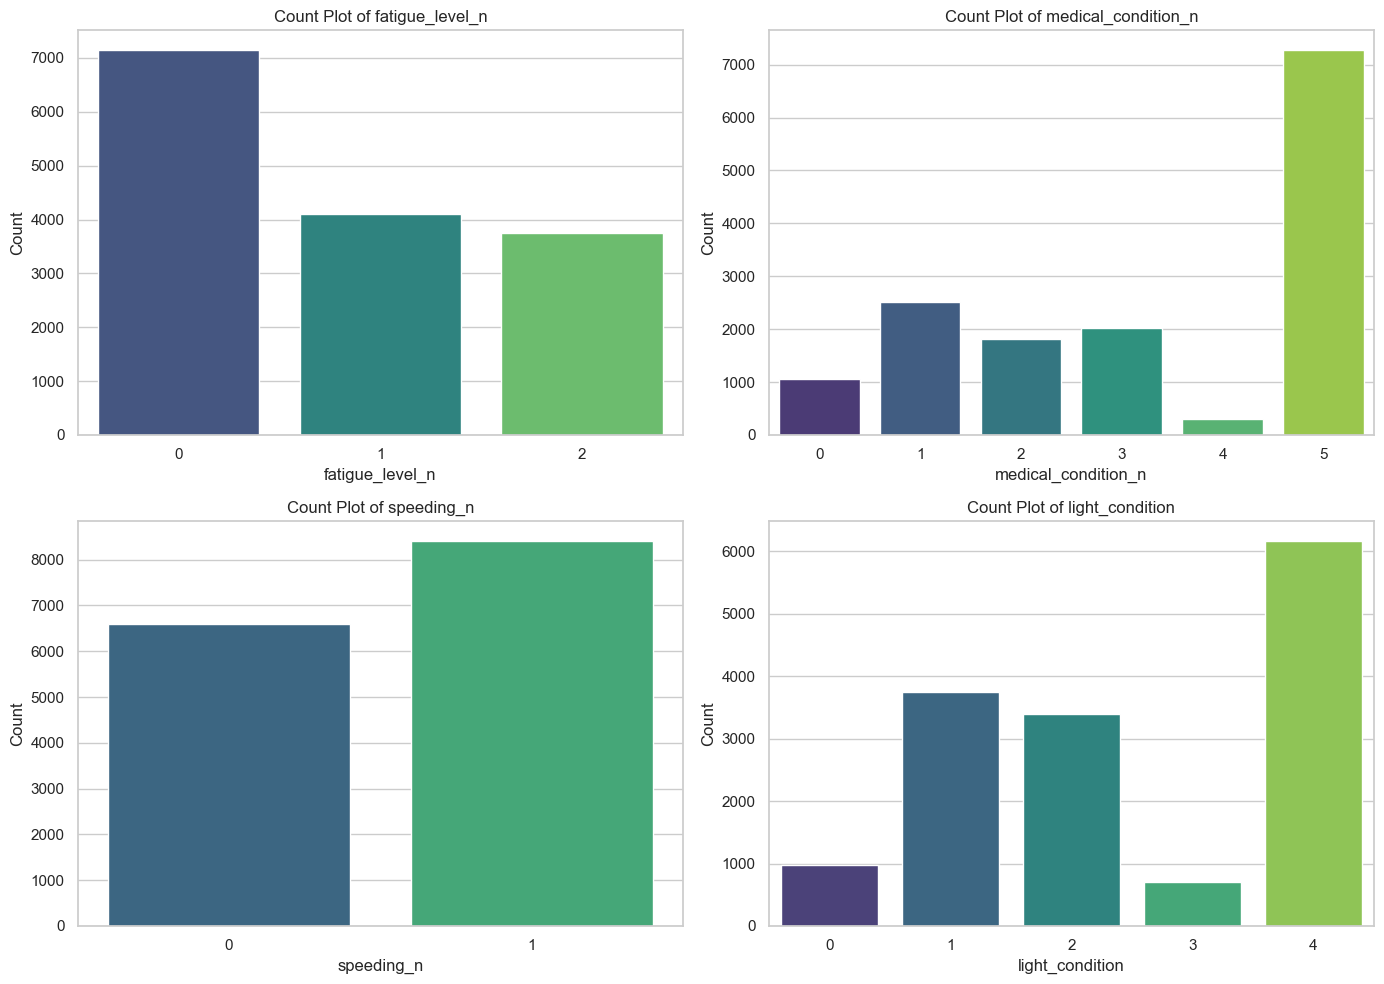

/Users/shivanshmahajan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


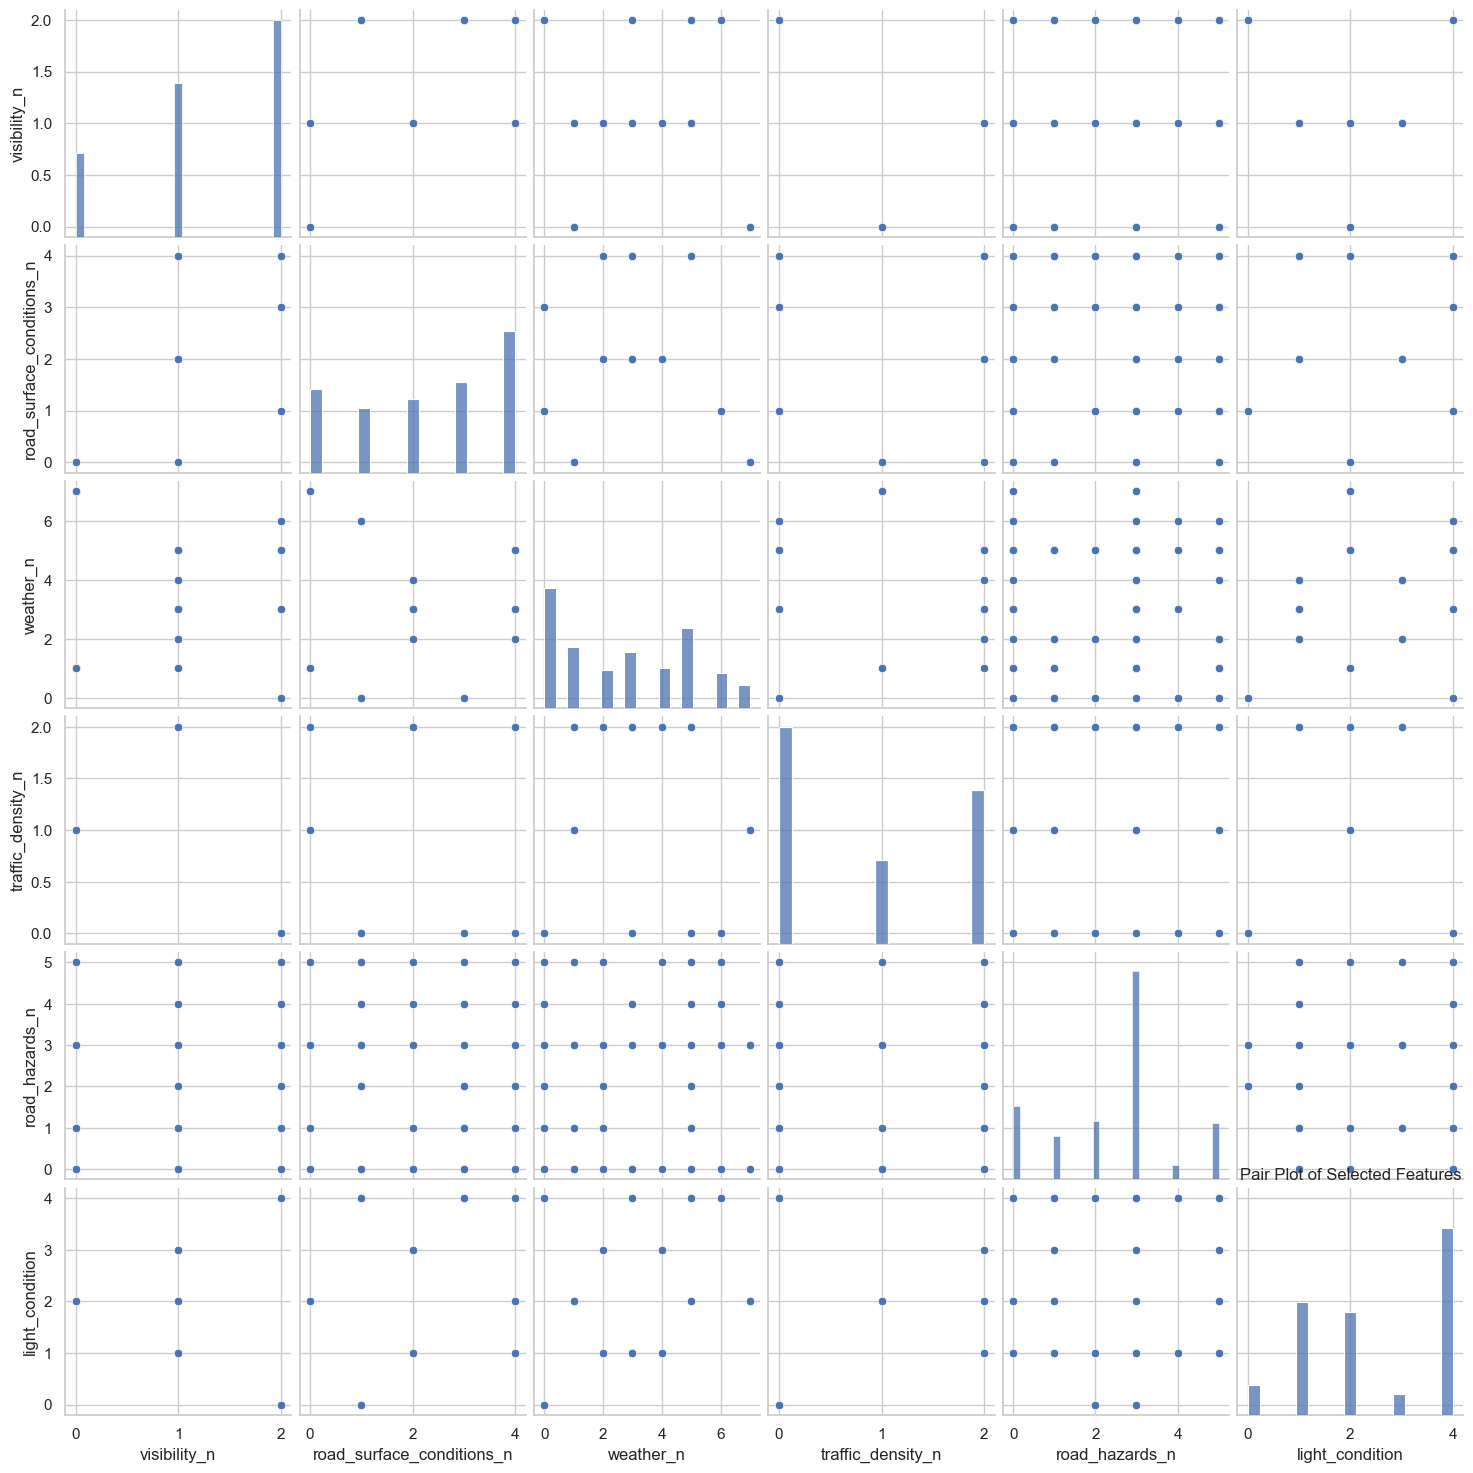

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset


# Check existing columns
print("Columns in the dataset:", df.columns)

# Encode categorical features using LabelEncoder if they exist
label_encoders = {
    'Visibility': LabelEncoder(),
    'Road_Surface_Conditions': LabelEncoder(),
    'Weather': LabelEncoder(),
    'Traffic_Density': LabelEncoder(),
    'Road_Hazards': LabelEncoder(),
    'Fatigue_Level': LabelEncoder(),
    'Medical_Condition': LabelEncoder(),
    'Speeding': LabelEncoder(),
    'Light_Conditions': LabelEncoder()
}

for col, le in label_encoders.items():
    if col in df.columns:
        df[f'{col.lower()}_n'] = le.fit_transform(df[col])
    else:
        print(f"Column '{col}' does not exist in the dataset.")

# List of columns to drop (only include those that exist in the DataFrame)
columns_to_drop = ['Light_Conditions', 'Road_Type', 'Landscape', 'Visibility', 'Road_Surface_Conditions', 'Weather', 'Traffic_Density', 'Road_Hazards', 'Time_of_Day', 'Fatigue_Level', 'Medical_Condition', 'Speeding', 'Driver_Age', 'Last_Service_Months_Ago']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the columns
df = df.drop(existing_columns_to_drop, axis='columns')

# Verify the remaining columns
print("Remaining columns in the dataset:", df.columns)

# Visualization settings
sns.set(style="whitegrid")

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Distribution Plots
plt.figure(figsize=(14, 10))
features = ['visibility_n', 'road_surface_conditions_n', 'weather_n', 'traffic_density_n', 'road_hazards_n']
existing_features = [feature for feature in features if feature in df.columns]
for i, feature in enumerate(existing_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Count Plots for Categorical Features
plt.figure(figsize=(14, 10))
categorical_features = ['fatigue_level_n', 'medical_condition_n', 'speeding_n', 'light_condition']
existing_categorical_features = [feature for feature in categorical_features if feature in df.columns]
for i, feature in enumerate(existing_categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[feature], palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Pair Plot
subset_features = ['visibility_n', 'road_surface_conditions_n', 'weather_n', 'traffic_density_n', 'road_hazards_n', 'light_condition']
existing_subset_features = [feature for feature in subset_features if feature in df.columns]
sns.pairplot(df[existing_subset_features])
plt.title('Pair Plot of Selected Features')
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame

# Separate features (X) and target variable (y)
X = df.drop('Risk_Score', axis=1)
y = df['Risk_Score'].apply(lambda x: 1 if x > 50 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:

from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Create an XGBoost classifier
model = XGBClassifier()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1168
           1       1.00      1.00      1.00      1832

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import joblib

# Load the dataset
df = pd.read_csv("/Users/shivanshmahajan/Desktop/ML-Crate/Vehicle Live Risk Prediction/Dataset/Vehicle Risk Prediction Dataset.csv")

# Encode categorical features using LabelEncoder
encoders = {
    'Visibility': LabelEncoder(),
    'Road_Surface_Conditions': LabelEncoder(),
    'Weather': LabelEncoder(),
    'Traffic_Density': LabelEncoder(),
    'Road_Hazards': LabelEncoder(),
    'Fatigue_Level': LabelEncoder(),
    'Medical_Condition': LabelEncoder(),
    'Speeding': LabelEncoder(),
    'Light_Conditions': LabelEncoder(),
}

for col, le in encoders.items():
    df[f'{col}_n'] = le.fit_transform(df[col])

# Define features and target
X = df[['Visibility_n', 'Road_Surface_Conditions_n', 'Weather_n', 'Traffic_Density_n', 'Road_Hazards_n',
        'Fatigue_Level_n', 'Medical_Condition_n', 'Speeding_n', 'Light_Conditions_n']]
y = df['Risk_Score'].apply(lambda x: 1 if x > 50 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train an XGBoost classifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)

# Save model, encoders, and scaler to a single file
with open('vehicle_risk_model.pkl', 'wb') as f:
    joblib.dump((model, encoders, scaler), f)


Accuracy: 0.9993333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1168
           1       1.00      1.00      1.00      1832

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

